In [12]:
from __future__ import division
import numpy as np
import scipy.io
import matplotlib.pyplot as plt
from enum import Enum
import scipy.optimize as so


In [17]:
class OptimizationAlgo(Enum):
    MINIMIZE = 1
    FMIN_CG = 2


def display_data(X : np.ndarray, number_of_images_to_plot:int) -> plt.figure():
    '''
    Reads a NxM matrix, makes a reshaped matrix and plots the individual images on a
    square grid depending on how many images have to be plotted
    :param X: M x N matrix
    :param : number of images to plot
    N : number of training samples
    M : number of parameters
    :return:
    '''

    random_images = np.random.randint(0, X.shape[0], number_of_images_to_plot)
    rows = np.sqrt(number_of_images_to_plot)
    columns = rows

    number_of_pixels = int(np.sqrt(X.shape[1]))
    fig = plt.figure(1 , figsize=(rows, columns))
    for index, value in enumerate(random_images):
        X_reshaped = X[value].reshape((number_of_pixels,number_of_pixels))
        fig.add_subplot(rows, columns, index + 1)
        plt.imshow(X_reshaped)

    return fig

def sigmoid(z):
    sig = 1 / (1 + np.exp(-z))
    return sig


def compute_cost_with_regularization(theta: np.ndarray, X: np.ndarray, y: np.ndarray,
                                     lambda_for_regularization: float) -> float:
    '''

    :param theta: np.array with Mx1 dimension
    :param X: np.array MxN dimension
    :param y: np.array with 1xN dimension
    :param lambda_for_regularization : float
    :return: cost J_theta
    '''
    theta_for_regularization = theta[1:]
    J_theta = np.mean(-y * np.log(sigmoid(theta.transpose().dot(X))) -
                      (1 - y) * np.log(1 - sigmoid(theta.transpose().dot(X)))) \
              + lambda_for_regularization / (2 * len(y)) * np.sum(theta_for_regularization ** 2)

    return J_theta
def compute_gradients_with_regularization(theta: np.ndarray, X: np.ndarray, y: np.ndarray,
                                          lambda_for_regularization: float) -> np.ndarray:
    '''

        :param theta: np.array with Mx1 dimension
        :param X: np.array MxN dimension
        :param y: np.array with 1xN dimension
        :return: gradients
        '''

    theta_t = np.hstack((0, theta[1:]))
    gradients = (sigmoid(theta.transpose().dot(X)) - y).dot(X.transpose()) / len(y) + lambda_for_regularization / len(
        y) * theta_t
    return gradients

def one_vs_all_classifier(X: np.ndarray, y:np.ndarray, num_labels:int, lambda_for_regularization:float, optimization_algo:str ) -> np.ndarray:
    '''
    :param X: N x M matrix
    :param y: 1 x N vector
    :param theta : M x 1 vector
    :param lambda_for_regularization
    :param optimization_algo : 'minimize', 'fmin_cg'
    M : number of parameteres
    N : number of training samples
    :return: optimized_theta with dimensions
    '''

    ones = np.ones((1, X.shape[0]))
    X = X.transpose()
    X = np.vstack((ones, X))
    y = y.flatten()

    theta = np.zeros((X.shape[0]))
    optimized_theta = np.zeros_like(theta)
    all_theta = np.zeros((X.shape[0], num_labels))
    cost = np.zeros((num_labels))

    for label in np.arange(1, 11, 1):
        y_training = (y == label).astype(int)
        optimized_parameters = minimize_cost_and_find_theta_with_regularization(theta, X, y_training, lambda_for_regularization, optimization_algo)
        all_theta[:,label-1] = optimized_parameters

    return all_theta

def predict_outcome_for_digit_dataset(X : np.ndarray, theta : np.ndarray):
    '''

    :param X: M x N matrix
    :param theta: M x number_of_digits
    :return: prediction : 1 x N
    '''
    ones = np.ones((1, X.shape[0]))
    X = X.transpose()
    X = np.vstack((ones, X))
    prediction = X.transpose().dot(theta)
    prediction = np.argmax(prediction, axis = 1) + 1

    return prediction

def minimize_cost_and_find_theta_with_regularization(initial_theta: np.ndarray, X: np.ndarray, y: np.ndarray,
                                                     lambda_for_regularization, algo: OptimizationAlgo) -> tuple():
    '''
       :param initial_theta: np.array with Mx1 dimension
       :param X: np.array MxN dimension
       :param y: np.array with 1xN dimension
       :param lambda_for_regularization
       :return: optimized parameters thetas
    '''

    if algo == OptimizationAlgo.MINIMIZE:
        # Advanced minimizing algorithm
        result = so.minimize(fun=compute_cost_with_regularization,
                             x0=initial_theta,
                             args=(X, y, lambda_for_regularization),
                             jac=compute_gradients_with_regularization)
        result = result.x

    if algo == OptimizationAlgo.FMIN_CG:
        result = so.fmin_cg(f = compute_cost_with_regularization,
                            x0 = initial_theta,
                            fprime=compute_gradients_with_regularization,
                            args=(X, y, lambda_for_regularization),
                            maxiter=50)

    '''
    fun : function to minimize, in this case it is compute_cost 
    x0 : initial value of the variable to be optimized for minimum cost 
    args : additional arguments to the compute_cost function 
    jac : function to calculate the gradient 
    '''
    return result


def get_accuracy(prediction: np.ndarray, y: np.ndarray) -> float:
    '''

    :param prediction: predicted vector from optimization
    :param y: actual output
    :return: accuracy
    '''
    accuracy = len(np.where((prediction == y))[0]) / len(y) * 100.0
    return accuracy

<Figure size 432x288 with 0 Axes>

End


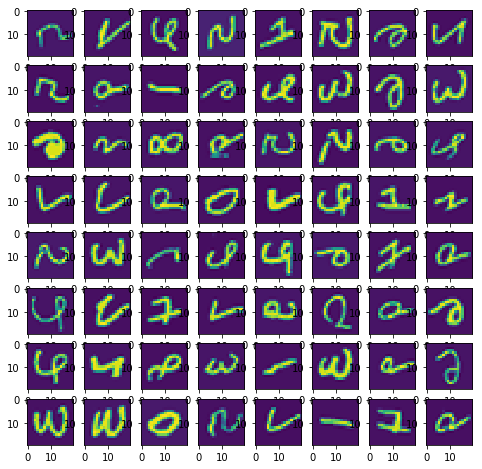

In [14]:

# Load Data
data = scipy.io.loadmat('datasets/ex3data1.mat')
print('End')

X_training = data['X']
y_training = data['y']

#Plot data
plot_training_data = display_data(X_training, 64)
plt.show()

In [15]:
#Toy data
theta = np.array([-2, -1, 1, 2])
X_t = np.arange(1, 16).reshape(3,5)/10
y = np.array([1,0,1,0,1])
ones = np.array(np.ones(5))
X = np.vstack((ones, X_t))

lambda_for_regularization  = 3

cost = compute_cost_with_regularization(theta, X, y, lambda_for_regularization)
gradients = compute_gradients_with_regularization(theta, X, y, lambda_for_regularization)

print(f'Cost : {cost}')
print(f'Gradients : {gradients}')

Cost : 2.534819396109744
Gradients : [ 0.14656137 -0.54855841  0.72472227  1.39800296]


In [18]:
# Training Data

num_labels = 10
lambda_for_regularization  = 0.1
all_theta = one_vs_all_classifier(X_training, y_training, num_labels, lambda_for_regularization, OptimizationAlgo.FMIN_CG)

prediction_on_training_set = predict_outcome_for_digit_dataset(X_training, all_theta)
accuracy = get_accuracy(prediction_on_training_set, y_training.flatten())
print(f'Accuracy on the training set is {accuracy}')

         Current function value: 0.013932
         Iterations: 50
         Function evaluations: 181
         Gradient evaluations: 181
         Current function value: 0.056160
         Iterations: 50
         Function evaluations: 142
         Gradient evaluations: 142
         Current function value: 0.061958
         Iterations: 50
         Function evaluations: 139
         Gradient evaluations: 139
         Current function value: 0.037407
         Iterations: 50
         Function evaluations: 154
         Gradient evaluations: 154
         Current function value: 0.063644
         Iterations: 50
         Function evaluations: 132
         Gradient evaluations: 132
         Current function value: 0.020034
         Iterations: 50
         Function evaluations: 175
         Gradient evaluations: 175
         Current function value: 0.033978
         Iterations: 50
         Function evaluations: 158
         Gradient evaluations: 158
         Current function value: 0.085544
      